In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [0]:
mnist_data = mnist.load_data()

In [0]:
(trainX, trainY), (testX, testY) = mnist_data

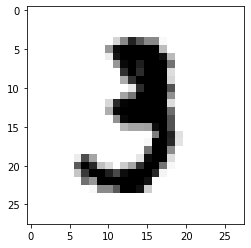

In [27]:
import matplotlib.pyplot as plt

plt.imshow(trainX[10], cmap = 'gray_r')

In [0]:
#Normalize data
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0

In [29]:
import numpy as np
a = trainX
a = a.reshape(trainX.shape+(1,))
a.shape

(60000, 28, 28, 1)

In [0]:
from sklearn.utils import shuffle

trainX, trainY = shuffle(trainX, trainY)

In [0]:
#reshape trainX, testX
trainX = trainX.reshape(trainX.shape+(1,))
testX = testX.reshape(testX.shape+(1,))

In [0]:
# Change labels to OneHot
# from sklearn.preprocessing import LabelBinarizer

# lb = LabelBinarizer()

# trainY = lb.fit_transform(trainY)
# testY = lb.fit_transform(testY)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Input, Activation
from tensorflow.keras.layers import BatchNormalization, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64,(3,3), padding = 'same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3), padding = 'same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

In [0]:
# # tang cuong data
# aug = ImageDataGenerator(rotation_range=0.18, zoom_range = 0.15,
#                          width_shift_range = 0.2, height_shift_range = 0.2,
#                          horizontal_flip = True)

learning_rate = 0.01

In [0]:
epochs = 10
batch_size = 64

opt = SGD(learning_rate = learning_rate,
          momentum = 0.9)

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [37]:
print('Start Traing!')
H = model.fit(trainX, trainY,
                        validation_data = (testX, testY),
                        # steps_per_epoch = trainX.shape[0]/batch_size,
                        epochs = epochs)

Start Traing!
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1040 - accuracy: 0.9692 - val_loss: 0.0475 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0424 - val_accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0333 -

In [0]:
model.save('mnist.h5')

In [0]:
saved_model = tf.keras.models.load_model('mnist.h5')

In [40]:
result = saved_model.predict(testX[1:2])
result

array([[1.5253672e-08, 2.3379731e-09, 1.0000000e+00, 7.0556310e-13,
        2.5540403e-09, 8.6464578e-16, 1.0802845e-08, 2.4057900e-11,
        2.8699799e-13, 1.6076583e-12]], dtype=float32)

In [0]:
final = np.argmax(result)

y_pred:  2


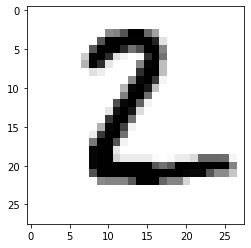

In [45]:
print('y_pred: ', final)
plt.imshow(testX[1], cmap = 'gray_r')

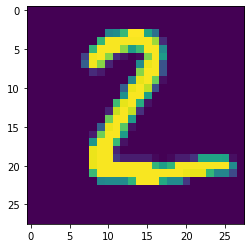

In [44]:
(trainX, trainY), (testX, testY) = mnist_data
plt.imshow(testX[1])